# Tarea - Ajuste de curvas

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [87]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [88]:
import numpy as np

m = 27
x = np.linspace(0,26,27)

y = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

#### POLINOMIO DE GRADO 3

In [89]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [4, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([m, 1]) # m renglones y 1 columna
x_1 = np.reshape(x, [m, -1]) #columna de factor x con m renglones y 1 columna
x_2 = np.reshape(x**2, [m,-1])
x_3 = np.reshape(x**3, [m,-1])

X = np.hstack((ones, x_1, x_2, x_3))

beta_inicial = np.random.rand(4)
y = np.reshape(y, [m,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo,
                beta_inicial,
                args=(X,y))
sol

      fun: 0.8404225571927703
 hess_inv: array([[ 2.27239030e-01, -6.41152655e-02,  4.83487121e-03,
        -1.06427974e-04],
       [-6.41152655e-02,  2.61881643e-02, -2.28212212e-03,
         5.43056150e-05],
       [ 4.83487121e-03, -2.28212212e-03,  2.13850329e-04,
        -5.32140621e-06],
       [-1.06427974e-04,  5.43056150e-05, -5.32140621e-06,
         1.36446335e-07]])
      jac: array([-0.00673267,  0.00720893, -0.0707334 , -1.3543991 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 307
      nit: 5
     njev: 59
   status: 2
  success: False
        x: array([9.56533301e+00, 8.53579115e-02, 3.14515198e-03, 3.17656004e-05])

In [90]:
funcion_de_costo(beta_inicial, X, y)

56224555.04906425

#### POLINOMIO DE GRADO 2

In [91]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [3, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([m, 1]) # m renglones y 1 columna
x_1 = np.reshape(x, [m, -1]) #columna de factor x con m renglones y 1 columna
x_2 = np.reshape(x**2, [m,-1])

X = np.hstack((ones, x_1, x_2))

beta_inicial = np.random.rand(3)
y = np.reshape(y, [m,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo,
                beta_inicial,
                args=(X,y))
sol

      fun: 0.8443845193983507
 hess_inv: array([[ 1.44233609e-01, -2.17582130e-02,  6.84215343e-04],
       [-2.17582130e-02,  4.57473200e-03, -1.64208716e-04],
       [ 6.84215343e-04, -1.64208716e-04,  6.31566016e-06]])
      jac: array([1.05798244e-06, 1.97812915e-05, 4.19922173e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 172
      nit: 9
     njev: 40
   status: 2
  success: False
        x: array([9.59128646e+00, 7.25241261e-02, 4.39024734e-03])

In [92]:
funcion_de_costo(beta_inicial, X, y)

2358540.0433581695

#### POLINOMIO DE GRADO 1

In [93]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [2, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([m, 1]) # m renglones y 1 columna
x_1 = np.reshape(x, [m, -1]) #columna de factor x con m renglones y 1 columna

X = np.hstack((ones, x_1))

beta_inicial = np.random.rand(2)
y = np.reshape(y, [m,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo,
                beta_inicial,
                args=(X,y))
sol

      fun: 2.370488951815176
 hess_inv: array([[ 0.07010582, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([-5.96046448e-07, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([9.11567629, 0.18667056])

In [94]:
funcion_de_costo(beta_inicial, X, y)

1196.5644520441301

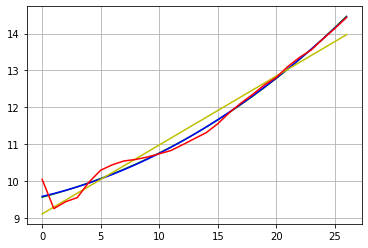

In [20]:
y_GRADO_3 = 9.56752189e+00 + 8.46498123e-02*x + 3.20206021e-03*(x**2) + 3.04662423e-05*(x**3)
y_GRADO_2 = 9.59128645e+00 + 7.25241277e-02*x + 4.39024721e-03*(x**2)
y_GRADO_1 = 9.11567633 + 0.18667056*x

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
#plt.scatter(x, y_con_ruido, s=100)
plt.plot(x, y_GRADO_3, "g")
plt.plot(x, y_GRADO_2, "b")
plt.plot(x, y_GRADO_1, "y")
plt.plot(x, y, "r")
plt.grid()

#### GRÁFICO DEL ERROR CUADRÁTICO

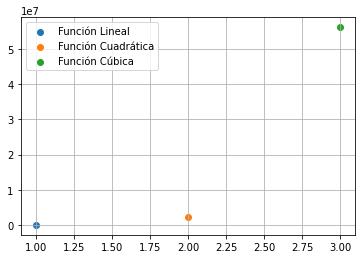

In [95]:
plt.figure()
plt.scatter(1, 1196.5644520441301 , label = "Función Lineal")
plt.scatter(2, 2358540.0433581695 , label = "Función Cuadrática")
plt.scatter(3, 56224555.04906425 , label = "Función Cúbica")
plt.grid()
plt.legend(loc = "best")

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [61]:
import pandas as pd

In [62]:
datos_poblacionales = pd.read_csv("population_data.csv")
datos_poblacionales

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


In [63]:
n = len(datos_poblacionales)
x = np.linspace(0,(n-1),n)
n

66

In [64]:
y = datos_poblacionales.Poblacion.tolist()

#### POLINOMIO GRADO 3

In [65]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [4, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([n, 1]) # m renglones y 1 columna
x_1 = np.reshape(x, [n, -1]) #columna de factor x con m renglones y 1 columna
x_2 = np.reshape(x**2, [n,-1])
x_3 = np.reshape(x**3, [n,-1])

X = np.hstack((ones, x_1, x_2, x_3))

beta_inicial = np.random.rand(4)
y = np.reshape(y, [n,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo,
                beta_inicial,
                args=(X,y))
sol

      fun: 25240442.637928408
 hess_inv: array([[ 1.08408286e-01, -1.24070481e-02,  3.78847120e-04,
        -3.37492792e-06],
       [-1.24070481e-02,  1.95414793e-03, -6.78304330e-05,
         6.47843271e-07],
       [ 3.78847120e-04, -6.78304330e-05,  2.51977117e-06,
        -2.51091036e-08],
       [-3.37492792e-06,  6.47843271e-07, -2.51091036e-08,
         2.57554006e-10]])
      jac: array([-0.25,  0.25, -0.25, -0.75])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 196
      nit: 5
     njev: 37
   status: 2
  success: False
        x: array([ 2.84777447e+04,  7.39080611e+02,  3.05648266e+01, -3.09231457e-01])

In [66]:
funcion_de_costo(beta_inicial, X, y)

281004960436.837

#### POLINOMIO GRADO 2

In [67]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [3, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([n, 1]) # m renglones y 1 columna
x_1 = np.reshape(x, [n, -1]) #columna de factor x con m renglones y 1 columna
x_2 = np.reshape(x**2, [n,-1])

X = np.hstack((ones, x_1, x_2))

beta_inicial = np.random.rand(3)
y = np.reshape(y, [n,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo,
                beta_inicial,
                args=(X,y))
sol

      fun: 210941621.44591814
 hess_inv: array([[ 6.26268630e-02, -3.82419886e-03,  4.86541583e-05],
       [-3.82419886e-03,  3.18952715e-04, -4.60155635e-06],
       [ 4.86541583e-05, -4.60155635e-06,  7.09937568e-08]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([2.44255951e+04, 1.51701298e+03, 4.14775145e-01])

In [68]:
funcion_de_costo(beta_inicial, X, y)

405728075619.3362

#### POLINOMIO GRADO 1

In [69]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [2, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([n, 1]) # m renglones y 1 columna
x_1 = np.reshape(x, [n, -1]) #columna de factor x con m renglones y 1 columna

X = np.hstack((ones, x_1))

beta_inicial = np.random.rand(2)
y = np.reshape(y, [n,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo,
                beta_inicial,
                args=(X,y))
sol

      fun: 212137169.54588675
 hess_inv: array([[ 2.26568061e-02, -5.20346954e-04],
       [-5.20346954e-04,  1.73119978e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 8
     njev: 14
   status: 0
  success: True
        x: array([24138.02556782,  1543.97319171])

In [70]:
funcion_de_costo(beta_inicial, X, y)

421817924949.9409

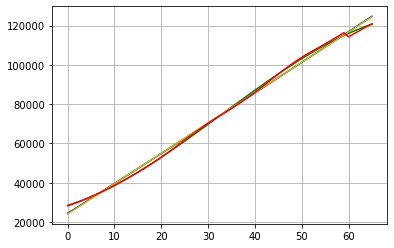

In [71]:
y_GRADO_3 = 2.84777478e+04 + 7.39080252e+02*x + 3.05648377e+01*(x**2) + -3.09231556e-01*(x**3)
y_GRADO_2 = 2.44255686e+04 + 1.51701468e+03*x + 4.14752989e-01*(x**2)
y_GRADO_1 = 24138.03430666 + 1543.97298595*x

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
#plt.scatter(x, y_con_ruido, s=100)
plt.plot(x, y_GRADO_3, "g")
plt.plot(x, y_GRADO_2, "b")
plt.plot(x, y_GRADO_1, "y")
plt.plot(x, y, "r")
plt.grid()

#### GRÁFICO DEL ERROR CUADRÁTICO

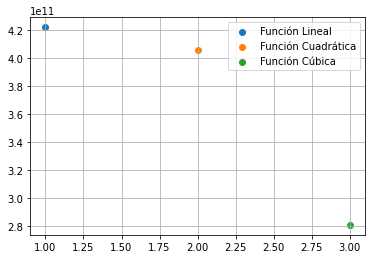

In [73]:
plt.figure()
plt.scatter(1, 421817924949.9409 , label = "Función Lineal")
plt.scatter(2, 405728075619.3362 , label = "Función Cuadrática")
plt.scatter(3, 281004960436.837 , label = "Función Cúbica")
plt.grid()
plt.legend(loc = "best")

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [75]:
y = datos_poblacionales.Nacimientos.tolist()

#### POLINOMIO GRADO 3

In [76]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [4, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([n, 1]) # m renglones y 1 columna
x_1 = np.reshape(x, [n, -1]) #columna de factor x con m renglones y 1 columna
x_2 = np.reshape(x**2, [n,-1])
x_3 = np.reshape(x**3, [n,-1])

X = np.hstack((ones, x_1, x_2, x_3))

beta_inicial = np.random.rand(4)
y = np.reshape(y, [n,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo,
                beta_inicial,
                args=(X,y))
sol

      fun: 441782342727.9865
 hess_inv: array([[ 3.02722800e-02, -3.01270120e-12,  2.96920797e-02,
        -5.80200264e-04],
       [-3.01270120e-12,  5.13367127e-13, -3.45869491e-12,
         6.73734163e-14],
       [ 2.96920797e-02, -3.45869491e-12,  2.91229996e-02,
        -5.69080112e-04],
       [-5.80200264e-04,  6.73734163e-14, -5.69080112e-04,
         1.11201526e-05]])
      jac: array([ 4.09600e+03, -1.22880e+04, -9.54368e+05, -7.05536e+07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 260
      nit: 9
     njev: 50
   status: 2
  success: False
        x: array([ 1.08828913e+06,  5.98750450e+04, -2.81401916e+02, -5.13039263e+00])

In [77]:
funcion_de_costo(beta_inicial, X, y)

348714431667180.25

#### POLINOMIO GRADO 2

In [78]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [3, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([n, 1]) # m renglones y 1 columna
x_1 = np.reshape(x, [n, -1]) #columna de factor x con m renglones y 1 columna
x_2 = np.reshape(x**2, [n,-1])

X = np.hstack((ones, x_1, x_2))

beta_inicial = np.random.rand(3)
y = np.reshape(y, [n,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo,
                beta_inicial,
                args=(X,y))
sol

      fun: 492922162258.6307
 hess_inv: array([[ 6.42636202e+00, -1.48703768e+00,  2.95699714e-02],
       [-1.48703768e+00,  3.44139497e-01, -6.84304352e-03],
       [ 2.95699714e-02, -6.84304352e-03,  1.36072132e-04]])
      jac: array([  -4096.,   32768., 2400256.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 299
      nit: 8
     njev: 72
   status: 2
  success: False
        x: array([ 1.02073392e+06,  7.27991881e+04, -7.81817556e+02])

In [79]:
funcion_de_costo(beta_inicial, X, y)

358224133251775.9

#### POLINOMIO GRADO 1

In [80]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [2, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([n, 1]) # m renglones y 1 columna
x_1 = np.reshape(x, [n, -1]) #columna de factor x con m renglones y 1 columna

X = np.hstack((ones, x_1))

beta_inicial = np.random.rand(2)
y = np.reshape(y, [n,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo,
                beta_inicial,
                args=(X,y))
sol

      fun: 4737951516669.34
 hess_inv: array([[ 2.89848621e-02, -6.63890972e-04],
       [-6.63890972e-04,  2.05436219e-05]])
      jac: array([      0., -196608.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 161
      nit: 5
     njev: 50
   status: 2
  success: False
        x: array([1564516.08027623,   21940.67611505])

In [81]:
funcion_de_costo(beta_inicial, X, y)

358561682732577.6

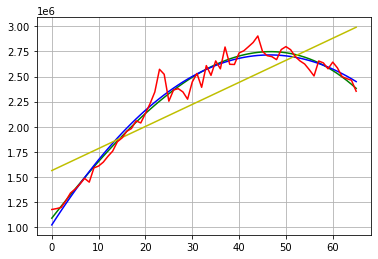

In [82]:
y_GRADO_3 = 1.08850040e+06 + 5.98533430e+04*x + -2.80799820e+02*(x**2) + -5.13529347e+00*(x**3)
y_GRADO_2 = 1.02126648e+06 + 7.27686710e+04*x + -7.81447004e+02*(x**2)
y_GRADO_1 = 1563124.12481475 + 21973.45683441*x

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
#plt.scatter(x, y_con_ruido, s=100)
plt.plot(x, y_GRADO_3, "g")
plt.plot(x, y_GRADO_2, "b")
plt.plot(x, y_GRADO_1, "y")
plt.plot(x, y, "r")
plt.grid()

#### GRÁFICO DE ERROR CUADRÁTICO

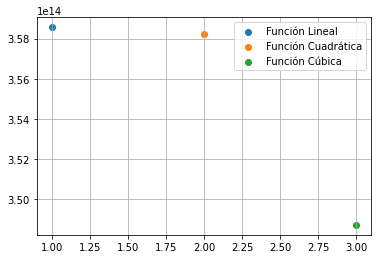

In [84]:
plt.figure()
plt.scatter(1, 358561682732577.6 , label = "Función Lineal")
plt.scatter(2, 358224133251775.9 , label = "Función Cuadrática")
plt.scatter(3, 348714431667180.25 , label = "Función Cúbica")
plt.grid()
plt.legend(loc = "best")